# **Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# **Loading Dataset**

In [2]:
# Load Dataset
df = pd.read_csv('data_clustering_inverse.csv')

In [3]:
# Show the first 10 rows
df.head(10)

,TransactionAmount,TransactionDuration,AccountBalance,TransactionGap,CustomerAge_Bin,TransactionType,Channel,CustomerOccupation,Target
0,14.09,81.0,5112.21,-49477134.0,Old,Debit,ATM,Doctor,0
1,376.24,141.0,13758.91,-42823516.0,Old,Debit,ATM,Doctor,2
2,126.29,56.0,1122.35,-41694656.0,Young,Debit,Online,Student,4
3,184.50,25.0,8569.06,-47403415.0,Young,Debit,Online,Student,0
4,13.45,198.0,7429.40,-33228915.0,Middle,Credit,Online,Student,3
5,92.15,172.0,781.68,-50165495.0,Young,Debit,ATM,Student,4
6,7.08,139.0,13316.71,-54228801.0,Middle,Credit,ATM,Doctor,0
7,171.42,291.0,2796.24,-47139776.0,Old,Credit,Branch,Retired,3
8,106.23,86.0,9095.14,-51289888.0,Middle,Credit,Branch,Engineer,0
9,815.96,120.0,1021.88,-50428775.0,Middle,Debit,ATM,Doctor,1


In [4]:
# Show the first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2513 non-null   float64
 1   TransactionDuration  2513 non-null   float64
 2   AccountBalance       2513 non-null   float64
 3   TransactionGap       2513 non-null   float64
 4   CustomerAge_Bin      2513 non-null   object 
 5   TransactionType      2513 non-null   object 
 6   Channel              2513 non-null   object 
 7   CustomerOccupation   2513 non-null   object 
 8   Target               2513 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 176.8+ KB


# **Data Splitting**

In [5]:
# Perform feature scaling
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'TransactionGap']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [6]:
# Perform feature encoding
df = pd.get_dummies(df, columns=['TransactionType', 'Channel', 'CustomerOccupation'])

In [7]:
# Perform feature encoding
le = LabelEncoder()
df['CustomerAge_Bin'] = le.fit_transform(df['CustomerAge_Bin'])

In [8]:
# Split dataset
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Building the Classification Model**

In [9]:
# Using Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

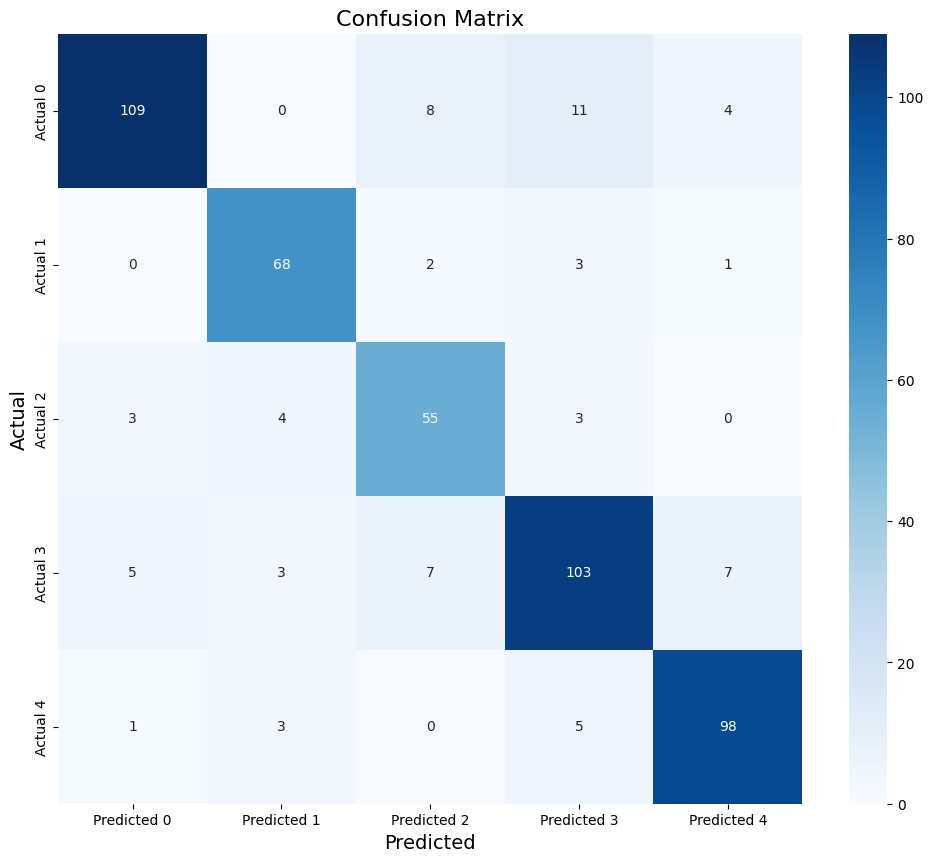

In [10]:
# Confusion matrix
y_pred = dt_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [11]:
# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       132
           1       0.87      0.92      0.89        74
           2       0.76      0.85      0.80        65
           3       0.82      0.82      0.82       125
           4       0.89      0.92      0.90       107

    accuracy                           0.86       503
   macro avg       0.85      0.87      0.86       503
weighted avg       0.86      0.86      0.86       503



In [12]:
# Saving the model using joblib
joblib.dump(dt_classifier, 'decision_tree_model.h5')

['decision_tree_model.h5']

In [13]:
# Using Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

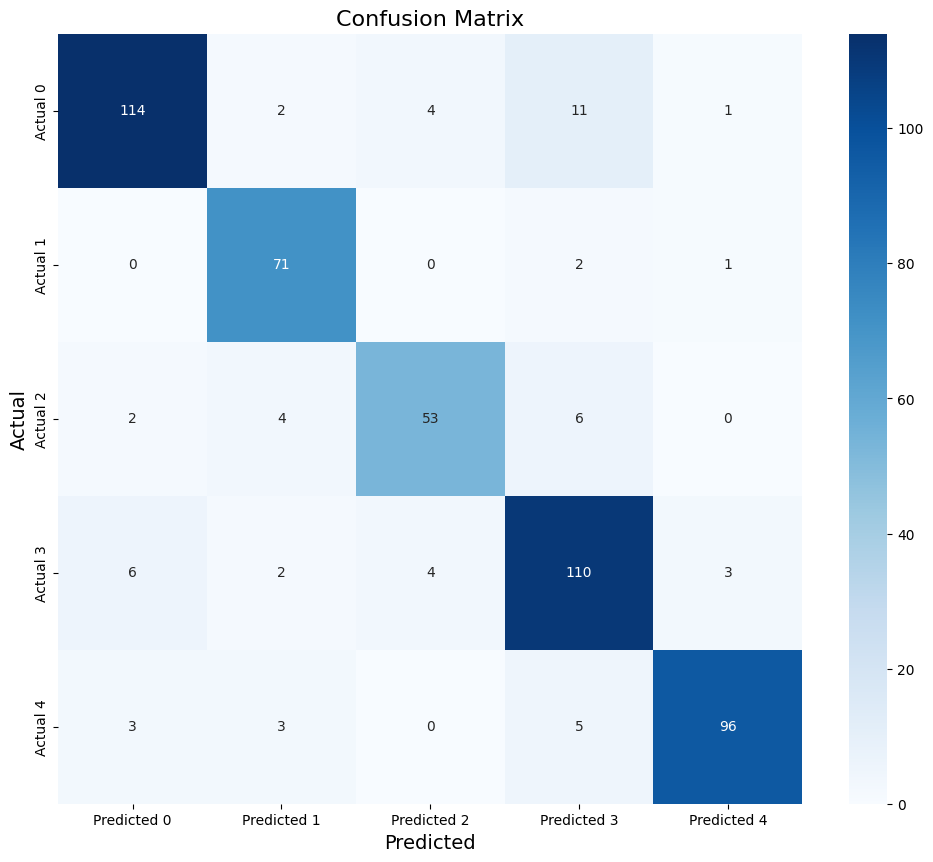

In [14]:
# Confusion matrix
y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [15]:
# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       132
           1       0.87      0.96      0.91        74
           2       0.87      0.82      0.84        65
           3       0.82      0.88      0.85       125
           4       0.95      0.90      0.92       107

    accuracy                           0.88       503
   macro avg       0.88      0.88      0.88       503
weighted avg       0.89      0.88      0.88       503



In [16]:
# Saving the model using joblib
joblib.dump(rf_classifier, 'random_forest_model.h5')

['random_forest_model.h5']

In [17]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


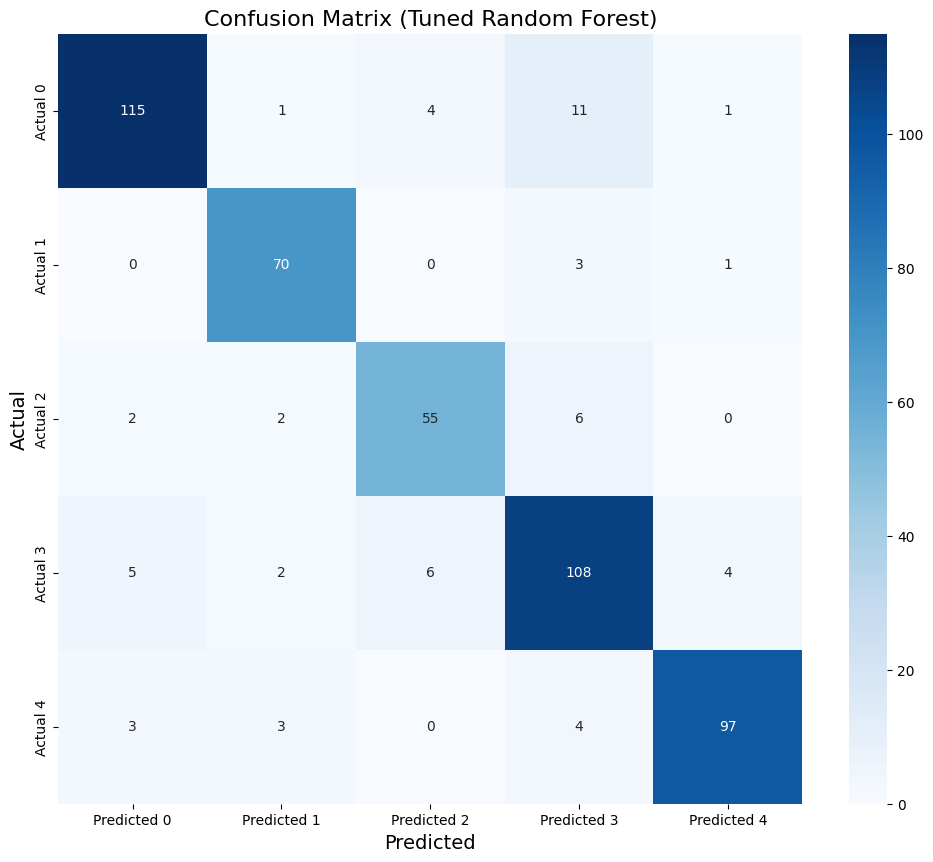

In [18]:
# Confusion matrix
model_dt = grid_search.best_estimator_

y_pred = model_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix (Tuned Random Forest)', fontsize=16)
plt.show()

In [19]:
# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       132
           1       0.90      0.95      0.92        74
           2       0.85      0.85      0.85        65
           3       0.82      0.86      0.84       125
           4       0.94      0.91      0.92       107

    accuracy                           0.88       503
   macro avg       0.88      0.89      0.89       503
weighted avg       0.89      0.88      0.89       503



In [20]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(model_dt, 'tuning_model.h5')

['tuning_model.h5']